In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, SimpleRNN, LSTM
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import reuters

In [141]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [142]:
x_train.shape, x_test.shape

((8982,), (2246,))

In [129]:
y_train.shape, y_test.shape

((8982,), (2246,))

In [130]:
x_train[:3]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [131]:
y_train[:50]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16,  3,  3,  4,  4, 19,  8, 16,
        3,  3, 21, 11,  4,  4,  3,  3,  1,  3,  1,  3, 16,  1,  4, 13, 20,
        1,  4,  4, 11,  3,  3,  3, 11, 16,  4,  4, 20, 18, 25, 19,  3],
      dtype=int64)

In [132]:
np.max(y_train)+1         # 46개의 뉴스 카테고리

46

In [133]:
lengths = [len(line) for line in x_train]

(array([  4., 250.,  77.,  62.,  74., 166.,  73.,  66., 103.,  93.,  72.,
        136.,  93., 134., 108., 132., 206., 130., 123., 190., 117., 103.,
        199., 125., 175., 135., 121., 194., 123., 143., 201., 115., 113.,
        212., 142., 192., 132., 128., 166.,  81., 102., 125.,  77.,  82.,
         85.,  42.,  74.,  37.,  29.,  76.,  28.,  34.,  47.,  35.,  25.,
         59.,  23.,  56.,  28.,  34.,  35.,  34.,  29.,  56.,  42.,  34.,
         54.,  46.,  57.,  36.,  26.,  41.,  35.,  49.,  55.,  36.,  32.,
         53.,  31.,  43.,  33.,  35.,  43.,  22.,  20.,  30.,  30.,  22.,
         26.,  35.,  23.,  20.,  19.,  24.,  10.,  10.,  25.,  20.,  17.,
         24.,  17.,  28.,  15.,  10.,  27.,  13.,   9.,  28.,  15.,  11.,
         18.,  11.,  26.,  16.,  13.,  22.,  11.,  13.,  25.,  13.,  20.,
         16.,  23.,  19.,  11.,  17.,  22.,  13.,  10.,  15.,   6.,   9.,
          8.,   7.,  10.,   7.,  10.,  11.,   5.,   9.,   9.,   7.,   6.,
          6.,   7.,  13.,  11.,   5., 

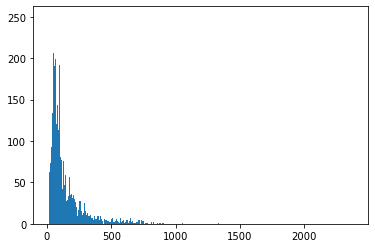

In [134]:
plt.hist(lengths, bins=1000)

In [135]:
x_train_seq = pad_sequences(x_train, maxlen=200) 
x_test_seq = pad_sequences(x_test, maxlen=200)

In [136]:
print(x_train_seq.shape, x_test_seq.shape)

(8982, 200) (2246, 200)


In [137]:
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train) 
y_test_oh = to_categorical(y_test)

In [84]:
y_train_oh.shape

(8982, 46)

In [85]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [86]:
model = Sequential()
model.add(Embedding(1000, 30, input_length=200))      
model.add(LSTM(100))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 30)           30000     
                                                                 
 lstm_6 (LSTM)               (None, 100)               52400     
                                                                 
 dense_8 (Dense)             (None, 46)                4646      
                                                                 
Total params: 87,046
Trainable params: 87,046
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [88]:
hist = model.fit(x_train_seq, y_train_oh, epochs=100, batch_size=20, validation_data=(x_test_seq, y_test_oh))

Epoch 1/100
450/450 [==============================] - 6s 12ms/step - loss: 2.3033 - accuracy: 0.4174 - val_loss: 2.0516 - val_accuracy: 0.5085
Epoch 2/100
450/450 [==============================] - 5s 11ms/step - loss: 2.1030 - accuracy: 0.4835 - val_loss: 2.4131 - val_accuracy: 0.4639
Epoch 3/100
450/450 [==============================] - 5s 10ms/step - loss: 2.0586 - accuracy: 0.4822 - val_loss: 1.9115 - val_accuracy: 0.5187
Epoch 4/100
450/450 [==============================] - 5s 11ms/step - loss: 1.8328 - accuracy: 0.5409 - val_loss: 1.7241 - val_accuracy: 0.5650
Epoch 5/100
450/450 [==============================] - 5s 11ms/step - loss: 1.7665 - accuracy: 0.5571 - val_loss: 1.7254 - val_accuracy: 0.5668
Epoch 6/100
450/450 [==============================] - 5s 11ms/step - loss: 1.7321 - accuracy: 0.5709 - val_loss: 1.7294 - val_accuracy: 0.5686
Epoch 7/100
450/450 [==============================] - 5s 11ms/step - loss: 1.6391 - accuracy: 0.5844 - val_loss: 1.7035 - val_accuracy:

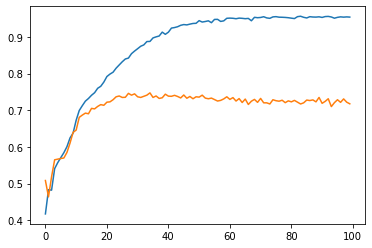

In [89]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

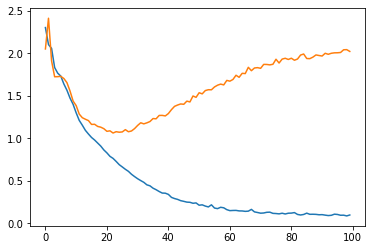

In [90]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [94]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [95]:
model = Sequential()
model.add(Embedding(1000, 30, input_length=200))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100))
model.add(Dense(46, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 200, 30)           30000     
                                                                 
 dropout_2 (Dropout)         (None, 200, 30)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 196, 64)           9664      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 64)           0         
 )                                                               
                                                                 
 lstm_7 (LSTM)               (None, 100)               66000     
                                                                 
 dense_9 (Dense)             (None, 46)                4646      
                                                     

In [96]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [97]:
hist = model.fit(x_train_seq, y_train_oh, epochs=100, batch_size=20, validation_data=(x_test_seq, y_test_oh))

Epoch 1/100
450/450 [==============================] - 10s 9ms/step - loss: 2.0273 - accuracy: 0.4777 - val_loss: 1.7855 - val_accuracy: 0.5347
Epoch 2/100
450/450 [==============================] - 4s 8ms/step - loss: 1.6750 - accuracy: 0.5679 - val_loss: 1.6939 - val_accuracy: 0.5650
Epoch 3/100
450/450 [==============================] - 4s 9ms/step - loss: 1.5397 - accuracy: 0.5973 - val_loss: 1.5850 - val_accuracy: 0.5775
Epoch 4/100
450/450 [==============================] - 4s 9ms/step - loss: 1.4125 - accuracy: 0.6299 - val_loss: 1.4976 - val_accuracy: 0.6118
Epoch 5/100
450/450 [==============================] - 4s 9ms/step - loss: 1.2860 - accuracy: 0.6693 - val_loss: 1.3447 - val_accuracy: 0.6549
Epoch 6/100
450/450 [==============================] - 4s 9ms/step - loss: 1.1915 - accuracy: 0.6972 - val_loss: 1.2614 - val_accuracy: 0.6794
Epoch 7/100
450/450 [==============================] - 4s 9ms/step - loss: 1.1154 - accuracy: 0.7169 - val_loss: 1.1963 - val_accuracy: 0.703

Epoch 58/100
450/450 [==============================] - 4s 8ms/step - loss: 0.3054 - accuracy: 0.9057 - val_loss: 1.4036 - val_accuracy: 0.7484
Epoch 59/100
450/450 [==============================] - 4s 8ms/step - loss: 0.3084 - accuracy: 0.9067 - val_loss: 1.3727 - val_accuracy: 0.7476
Epoch 60/100
450/450 [==============================] - 4s 8ms/step - loss: 0.3068 - accuracy: 0.9028 - val_loss: 1.3952 - val_accuracy: 0.7502
Epoch 61/100
450/450 [==============================] - 4s 8ms/step - loss: 0.3076 - accuracy: 0.9049 - val_loss: 1.4241 - val_accuracy: 0.7480
Epoch 62/100
450/450 [==============================] - 4s 8ms/step - loss: 0.2919 - accuracy: 0.9085 - val_loss: 1.4484 - val_accuracy: 0.7471
Epoch 63/100
450/450 [==============================] - 4s 8ms/step - loss: 0.2882 - accuracy: 0.9095 - val_loss: 1.4460 - val_accuracy: 0.7449
Epoch 64/100
450/450 [==============================] - 4s 8ms/step - loss: 0.2817 - accuracy: 0.9109 - val_loss: 1.4352 - val_accuracy:

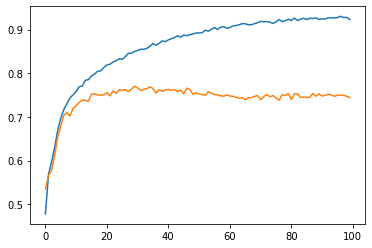

In [98]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

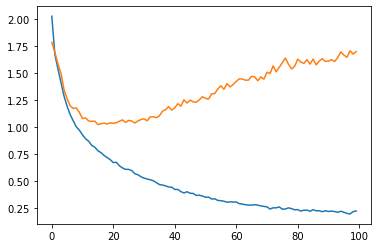

In [99]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [101]:
model = Sequential()
model.add(Embedding(1000, 30, input_length=200))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(46, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 200, 30)           30000     
                                                                 
 dropout_4 (Dropout)         (None, 200, 30)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 196, 64)           9664      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 49, 64)           0         
 1D)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 49, 100)           66000     
                                                                 
 lstm_10 (LSTM)              (None, 100)               80400     
                                                     

In [102]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [103]:
hist = model.fit(x_train_seq, y_train_oh, epochs=100, batch_size=20, validation_data=(x_test_seq, y_test_oh))

Epoch 1/100
450/450 [==============================] - 8s 15ms/step - loss: 2.1702 - accuracy: 0.4545 - val_loss: 1.9123 - val_accuracy: 0.4813
Epoch 2/100
450/450 [==============================] - 6s 13ms/step - loss: 1.8331 - accuracy: 0.5369 - val_loss: 1.7219 - val_accuracy: 0.5396
Epoch 3/100
450/450 [==============================] - 6s 13ms/step - loss: 1.7300 - accuracy: 0.5675 - val_loss: 1.6504 - val_accuracy: 0.5908
Epoch 4/100
450/450 [==============================] - 6s 13ms/step - loss: 1.6398 - accuracy: 0.5983 - val_loss: 1.5925 - val_accuracy: 0.6055
Epoch 5/100
450/450 [==============================] - 6s 13ms/step - loss: 1.5770 - accuracy: 0.6124 - val_loss: 1.5214 - val_accuracy: 0.6278
Epoch 6/100
450/450 [==============================] - 6s 13ms/step - loss: 1.5124 - accuracy: 0.6354 - val_loss: 1.5135 - val_accuracy: 0.6264
Epoch 7/100
450/450 [==============================] - 6s 13ms/step - loss: 1.4421 - accuracy: 0.6503 - val_loss: 1.4369 - val_accuracy:

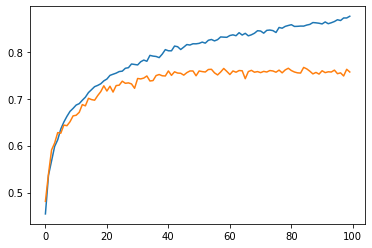

In [104]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

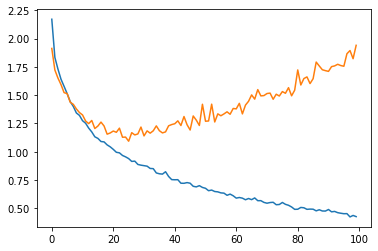

In [105]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [57]:
model = Sequential()
model.add(LSTM(8, input_shape=(300,1000)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 8)                 32288     
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32,297
Trainable params: 32,297
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [64]:
model.fit(x_train_oh, y_train, epochs=10, batch_size=64, validation_data=(x_test_oh, y_test))

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [60]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(300,1000)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 8072      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,081
Trainable params: 8,081
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [62]:
model.fit(x_train_oh, y_train, epochs=10, batch_size=64, validation_data=(x_test_oh, y_test))

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.